# Importing all the required dependencies

In [62]:
#Importing all the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
titanic_data = pd.read_csv(r'titanic.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#viewing the no.of rows and columns
titanic_data.shape

(891, 12)

# Data preprocessing

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Handling missing values

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [8]:
mean_imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')

In [9]:
df = pd.DataFrame(titanic_data)

In [10]:
df['Age'] = pd.DataFrame(mean_imputer.fit_transform(df[['Age']]))

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
mode_imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')

In [13]:
df['Embarked'] = pd.DataFrame(mode_imputer.fit_transform(df[['Embarked']]))

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Some informations

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
df['Age_group'] = pd.cut(df['Age'], 
                              bins = [min(df.Age), 
                                      df.Age.quantile(0.25),
                                      df.Age.mean(),
                                      df.Age.quantile(0.75),
                                      max(df.Age)], 
                              include_lowest = True,
                              labels = ["Kids", "Teens", "Adults", "Old"])

In [20]:
df['Age_group'].value_counts()

Adults    290
Kids      231
Old       217
Teens     153
Name: Age_group, dtype: int64

# Data Visualization

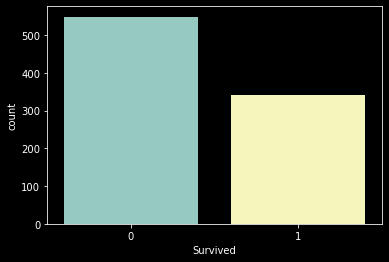

In [22]:
plt.style.use("dark_background")
sns.countplot(x='Survived',data=df)

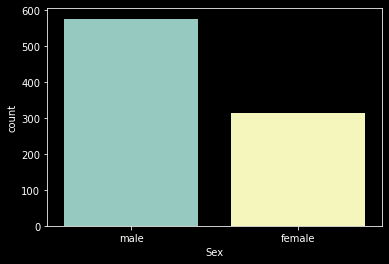

In [23]:
sns.countplot(x='Sex',data=df)

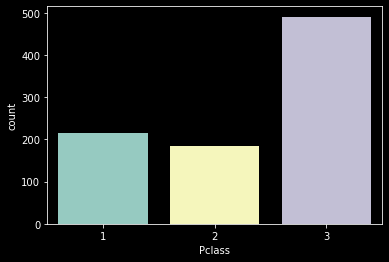

In [24]:
sns.countplot(x='Pclass',data=df)

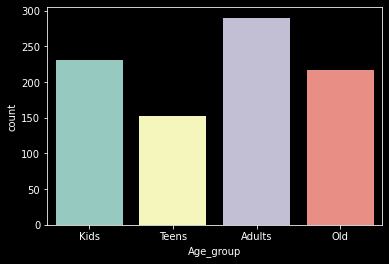

In [25]:
sns.countplot(x='Age_group',data=df)

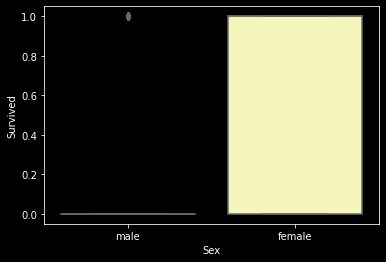

In [26]:
sns.boxplot(data=df,x='Sex',y='Survived')
# From this we can infer that almost all the females have survived and
# unfortunately almost all the males have not survived, may be 1% have survived among males

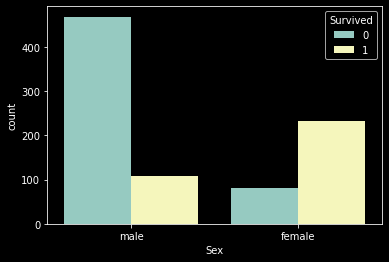

In [27]:
sns.countplot(x='Sex',hue='Survived',data=df)

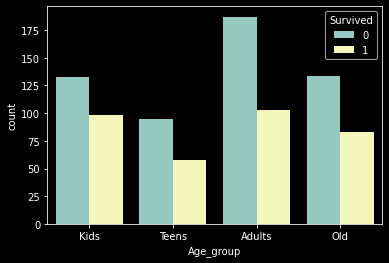

In [28]:
sns.countplot(x='Age_group',hue='Survived',data=df)

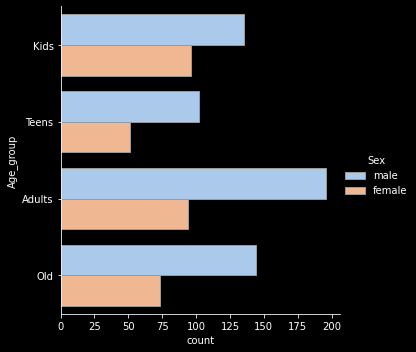

In [29]:
sns.catplot(data = df,y = 'Age_group',hue = 'Sex',kind = 'count',palette='pastel',edgecolor = '0.6')

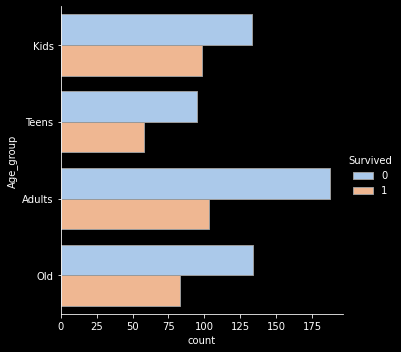

In [30]:
sns.catplot(data = df,y = 'Age_group',hue = 'Survived',kind = 'count',palette='pastel',edgecolor = '0.6')
#From the similarity of 2 catplots it is more clear that females have survived and males could not

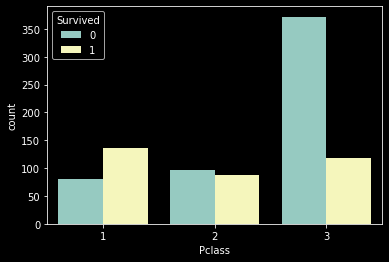

In [31]:
sns.countplot(x='Pclass',hue='Survived',data=df)

# Label encoding 

In [32]:
#before model building, we should encode the categorical values
df['Sex'].head(5)

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [34]:
df['Sex'].head(5)

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [35]:
df['Embarked'].head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [36]:
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

In [37]:
df['Embarked'].head(5)

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32

In [38]:
df['Age'] = df['Age'].astype(int)
df['Sex'] = df['Sex'].astype(int)
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int32
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked          int32
Age_group      category
dtype: object

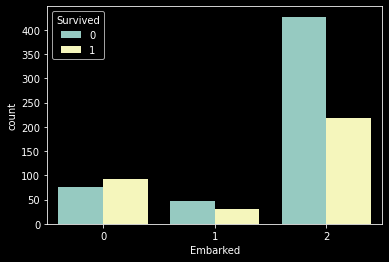

In [39]:
sns.countplot(x='Embarked',hue='Survived',data=df)  # C: 0, Q : 1, S: 2 

# Model Building

In [40]:
# From above code it is clear that male are encoded to be 1 and female are encoded to be 0.
# Separating features and targets
X = df[['Age','Sex','Pclass','Embarked']] # features

In [41]:
Y = df['Survived'] #target

In [42]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=3)

In [43]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(712, 4) (179, 4) (712,) (179,)


In [44]:
model = LogisticRegression()

# Model Training

In [45]:
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [46]:
Xtrain_prediction = model.predict(Xtrain)

In [47]:
print(Xtrain_prediction)

[0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 

# Model evaluation

In [48]:
training_accuracy = accuracy_score(Ytrain,Xtrain_prediction)

In [49]:
print(training_accuracy)

0.8019662921348315


In [50]:
model.fit(Xtest,Ytest)

LogisticRegression()

In [51]:
Xtest_prediction = model.predict(Xtest)

In [52]:
print(Xtest_prediction)

[0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1]


In [53]:
test_accuracy = accuracy_score(Ytest,Xtest_prediction)

In [54]:
print(test_accuracy)

0.7988826815642458


In [55]:
print('training accuracy: ',training_accuracy, 'test accurcay: ',test_accuracy)

training accuracy:  0.8019662921348315 test accurcay:  0.7988826815642458


# Model Deployment

In [56]:
import pickle

In [57]:
file_name = 'trained_model.sav'

In [58]:
pickle.dump(model,open(file_name,'wb'))

In [59]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [61]:
input_data = (20,1,3,0) # age, sex, Pclass, Embarked
input_array = np.asarray(input_data)
input_reshaped = input_array.reshape(1,-1)
prediction = loaded_model.predict(input_reshaped)
print(prediction[0])
if prediction[0]:
    print('This passenger has survived')
else:
    print('This passenger has not survived')

0
This passenger has not survived


C:\Users\Jai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
